# Spam Detector - Classification
The data contains 100 features extracted from a corpus of emails. Some of the emails are spam and some are normal. Our task is to make a spam detector.<br>

For more information about the dataset use the following Kaggle link:<br>
https://www.kaggle.com/competitions/just-the-basics-the-after-party/data

## Import Libraries and Load Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",120)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # file path

/kaggle/input/just-the-basics-the-after-party/train_labels.csv
/kaggle/input/just-the-basics-the-after-party/train.csv
/kaggle/input/just-the-basics-the-after-party/test.csv


In [2]:
# load data
train=pd.read_csv('/kaggle/input/just-the-basics-the-after-party/train.csv')
labels=pd.read_csv("/kaggle/input/just-the-basics-the-after-party/train_labels.csv")
df=pd.concat([train,labels], axis=1) # combine train and label
df.rename(columns={'0': 'label'}, inplace=True) # rename column from '0' to 'label'

## EDA - Exploratory Data Analysis


In [3]:
df.head() # first 5 entries

,0.097094,1.1133,45.038,0.88184,0.087009,1.041,1.5486,3.498,1.8578,0.0096729,4.5162,2.4716,0.07963,4.0896,1.6902,0.91547,0.091189,1.4153,3.1192,0.0060186,0.014375,0.037306,0.61815,0.055585,0.01074,3.0279,1.8636,0.014393,0.21286,2.5653,NaN,0.028234,0.040381,0.065676,0.79874,6.0681,1.3486,0.78914,0.48925,0.044965,3.6954,1.6518,NaN.1,2.0031,1.6097,4.2557,0.016952,1.6888,0.070763,0.028963,3.469,0.04013,0.651,0.076915,0.82981,2.6242,0.0077223,1.9591,0.091773,0.0014508,0.062135,0.097433,0.081459,0.089605,0.019517,0.39503,2.201,3.6572,0.022237,0.042535,4.525,0.16949,0.67231,0.052349,4.6379,0.012962,0.019132,4.5504,0.005637,0.26957,3.5743,0.040547,3.4724,0.0049949,0.023048,1.916,0.77773,0.032171,NaN.2,0.041627,0.076209,3.6654,0.061607,0.0031605,0.036038,0.0845,2.4517,3.3373,0.065201,0.091158,label
0,0.050086,0.11158,94.0800,1.76500,0.089417,4.80470,0.26742,NaN,0.56473,0.035123,1.48270,2.5929,0.223980,3.9993,3.4247,1.79450,0.070337,0.7135,1.1426,0.018661,0.065120,0.081132,NaN,0.060869,0.083399,2.1228,0.73517,0.096963,0.011055,3.9510,0.091110,0.018081,0.038182,0.017668,0.91469,41.0140,3.707000,2.0693,4.95710,0.016032,4.3729,3.23560,0.092688,0.22587,6.3327,2.56210,0.030500,4.17120,0.043128,1.895900,0.19076,0.049980,0.968310,0.095265,4.9342,3.6403,0.085841,2.5845,0.038742,0.000319,0.052713,0.019645,0.094237,0.036511,0.071179,0.23586,4.07320,1.24440,0.094579,0.931980,2.35650,0.82129,0.049131,0.027010,1.8648,0.011165,0.048432,0.73120,0.099694,0.168960,1.63890,2.739500,0.55716,0.070742,0.022589,1.6064,3.03450,0.063698,0.951680,0.065822,0.054712,4.16870,0.075432,0.010869,0.063972,0.079892,1.9795,3.5064,0.072132,0.091950,1
1,0.088447,2.36340,5.0580,0.14436,0.064547,2.44400,4.25450,0.36506,1.86090,0.009759,3.50750,3.6126,0.019720,2.2723,1.1937,1.03690,0.086313,1.5003,2.3868,0.052785,0.087950,0.067695,1.46600,0.024131,0.035304,1.4450,3.83900,0.000325,0.092129,4.7438,0.033202,0.083371,0.014163,0.055091,5.06020,1.0771,0.003966,4.0361,NaN,0.019126,1.9285,0.77643,0.018482,4.57630,1.0067,1.57450,0.054700,0.34146,0.048967,0.019560,2.01550,0.072080,0.087619,0.094343,3.9453,0.5248,0.082408,1.3841,0.032529,0.024050,0.000991,0.067660,0.023938,0.090783,0.003342,2.95580,3.86110,3.76860,0.071469,0.089305,1.73020,3.76830,0.047478,0.090466,5.0165,0.088609,0.003601,1.04530,0.032310,0.090294,5.02590,0.081161,1.05090,0.015816,20.088000,1.0700,4.34680,0.061113,0.073222,0.098675,0.017203,4.56130,0.046505,NaN,0.084066,0.064829,3.3087,2.9969,0.064328,0.036793,0
2,0.772540,0.59469,NaN,0.97515,0.015987,0.52884,1.48840,3.96100,4.80630,0.048617,2.72120,2.5029,0.023355,4.5088,3.1327,3.86270,0.090923,4.3838,2.1928,0.026211,0.099073,0.019689,2.21980,0.042799,0.037704,4.1482,4.07180,0.017883,0.092244,3.6523,0.010751,0.055596,0.015418,0.093861,0.94272,1.0224,7.564100,2.6595,1.47560,0.772090,2.9316,1.82140,0.036775,3.85380,1.0653,NaN,0.039000,4.51470,0.088371,0.098904,4.13170,0.020435,0.364220,0.049476,0.4050,3.1788,0.040688,2.2262,0.050689,0.005585,0.087453,0.022281,0.041949,0.022086,0.008299,2.94100,0.98445,0.91658,0.050185,0.040575,1.52540,1.27960,0.014323,0.004959,0.9157,0.019139,NaN,3.49430,0.081137,0.016771,0.13016,1.063700,4.94410,0.377000,0.041079,1.5943,4.62410,0.407080,0.051634,0.057662,0.022891,0.12832,0.065028,0.036862,0.010010,0.020709,2.5237,2.1711,0.080865,0.081553,0
3,0.382410,4.81090,1955.1000,0.46050,0.024453,2.02980,3.74030,4.22810,2.42920,0.156830,4.67990,1.2061,0.160480,4.3383,1.7294,4.15550,0.004260,4.9250,4.3986,0.070821,0.034121,0.087522,0.17924,0.097594,0.310430,5.0021,0.79369,0.100470,0.134130,3.0778,0.053728,0.066446,0.391440,0.028428,3.18730,181.0600,2.794400,NaN,1.34760,0.646900,4.6828,3.89630,0.072960,0.61090,3.3776,0.29307,0.083117,4.00290,0.369800,0.397220,4.28580,NaN,0.066497,0.754690,2.8442,3.9069,0.066547,3.6738,0.093712,0.026305,0.186150,0.049486,0.042992,0.256420,0.294860,1.28700,0.80866,0.42315,0.094649,0.217580,2.71120,2.14700,0.430170,0.042579,NaN,0.043946,0.067050,4.97960,0.061703,0.478570,1.70650,1.437800,3.82900,0.405630,NaN,1.6429,4.

In [4]:
df.info() # infos about the samples, features and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Columns: 101 entries, 0.097094 to label
dtypes: float64(100), int64(1)
memory usage: 472.8 KB


In [5]:
df.isnull().sum() # checking for missing values

0.097094    15
1.1133      10
45.038      20
0.88184     20
0.087009    25
            ..
2.4517      16
3.3373      18
0.065201    19
0.091158    26
label        0
Length: 101, dtype: int64

We have a total amount of 599 samples, 101 features and some missing values

In [6]:
df.describe() # statistical infos about features

,0.097094,1.1133,45.038,0.88184,0.087009,1.041,1.5486,3.498,1.8578,0.0096729,4.5162,2.4716,0.07963,4.0896,1.6902,0.91547,0.091189,1.4153,3.1192,0.0060186,0.014375,0.037306,0.61815,0.055585,0.01074,3.0279,1.8636,0.014393,0.21286,2.5653,NaN,0.028234,0.040381,0.065676,0.79874,6.0681,1.3486,0.78914,0.48925,0.044965,3.6954,1.6518,NaN.1,2.0031,1.6097,4.2557,0.016952,1.6888,0.070763,0.028963,3.469,0.04013,0.651,0.076915,0.82981,2.6242,0.0077223,1.9591,0.091773,0.0014508,0.062135,0.097433,0.081459,0.089605,0.019517,0.39503,2.201,3.6572,0.022237,0.042535,4.525,0.16949,0.67231,0.052349,4.6379,0.012962,0.019132,4.5504,0.005637,0.26957,3.5743,0.040547,3.4724,0.0049949,0.023048,1.916,0.77773,0.032171,NaN.2,0.041627,0.076209,3.6654,0.061607,0.0031605,0.036038,0.0845,2.4517,3.3373,0.065201,0.091158,label
count,584.000000,589.000000,579.000000,579.000000,574.000000,583.000000,586.000000,582.000000,580.000000,580.000000,586.000000,583.000000,585.000000,576.000000,572.000000,583.000000,577.000000,587.000000,582.000000,578.000000,582.000000,578.000000,584.000000,581.000000,582.000000,590.000000,587.000000,581.000000,584.000000,579.000000,575.000000,581.000000,590.000000,586.000000,581.000000,582.000000,577.000000,580.000000,578.000000,585.000000,578.000000,579.000000,586.000000,578.000000,585.000000,582.000000,587.000000,585.000000,5.840000e+02,587.000000,584.000000,579.000000,576.000000,586.000000,576.000000,578.000000,587.000000,578.000000,583.000000,587.000000,578.000000,587.000000,586.000000,586.000000,579.000000,576.000000,579.000000,577.000000,584.000000,581.000000,577.000000,586.000000,588.000000,586.000000,580.000000,578.000000,581.000000,581.000000,577.000000,587.000000,584.000000,577.000000,581.000000,582.000000,577.000000,580.000000,581.000000,586.000000,587.000000,585.000000,578.000000,584.000000,583.000000,577.000000,570.000000,582.000000,583.000000,581.000000,580.000000,573.000000,599.000000
mean,0.326927,2.560168,291.018659,2.646879,0.182357,2.513011,2.644158,2.550598,2.502491,0.128137,2.516423,2.717569,0.129686,2.517683,2.619194,2.576820,0.656677,2.522735,2.551695,0.141032,0.131372,0.066194,2.524970,0.138075,0.156040,2.548291,2.496052,0.128383,0.219159,2.494499,0.155978,0.147476,0.190881,0.074072,2.571146,48.464702,1.734680,2.568982,2.441835,0.565741,2.548669,2.567514,0.132640,2.454152,4.655230,2.624641,0.181427,2.577448,1.151693e-01,0.246336,2.525698,0.126657,0.314514,0.124854,2.532879,2.556459,0.355943,2.644023,0.103051,0.191094,0.095163,0.124502,0.176163,0.353918,0.089077,2.560379,2.544435,2.520560,0.173896,0.224271,2.580143,2.553217,0.146400,0.054542,2.529000,0.214129,0.285675,2.502184,0.096749,0.337358,2.513146,0.976629,2.619022,0.158205,0.826410,2.569923,2.631861,0.310937,0.368290,0.069404,0.083372,2.530778,0.174317,0.094279,0.174730,0.111954,2.538304,2.603233,0.182338,0.152419,0.422371
std,0.545668,1.433962,621.837922,1.446142,0.421245,1.449120,1.473258,1.450292,1.452482,0.387060,1.492910,1.435393,0.242395,1.433841,1.400231,1.455656,1.865458,1.465733,1.424728,0.565341,0.463744,0.124093,1.459265,0.468336,0.348455,1.465097,1.443647,1.778699,0.333398,1.394756,0.363853,0.484140,0.436935,0.192068,1.435938,110.300767,1.660272,1.430149,1.485150,0.859322,1.468269,1.438737,0.458612,1.446495,15.690023,1.443916,1.182511,1.413025,3.755095e-01,0.565347,1.491138,0.455536,0.909513,0.254120,1.446476,1.396901,0.953293,1.455392,0.570550,0.847069,0.168451,0.327171,0.533446,0.597862,0.264496,1.440654,1.442430,1.470483,0.511451,0.937082,1.458525,1.447998,0.347374,0.068342,1.407212,0.737107,1.366658,1.483199,0.207711,0.643904,1.455887,1.318353,1.415633,0.309848,3.350032,1.445546,1.430279,0.650890,1.128722,0.305187,0.194193,1.442970,0.611310,0.367274,0.564666,0.217412,1.459580,1.420534,0.559537,0.303201,0.494350
min,0.000445,0.055685,1.007800,0.032513,0.000100,0.014350,0.016254,0.039126,0.036541,0.000090,0.015709,0.028455,0.000160,0.045533,0.011802,0.006915,0.000036,0.019814,0.037994,0.000365,0.000018,0.000345,0.031361,0.000040,0.000260,0.049962

In [7]:
df.corr() # the correlation between the features

,0.097094,1.1133,45.038,0.88184,0.087009,1.041,1.5486,3.498,1.8578,0.0096729,4.5162,2.4716,0.07963,4.0896,1.6902,0.91547,0.091189,1.4153,3.1192,0.0060186,0.014375,0.037306,0.61815,0.055585,0.01074,3.0279,1.8636,0.014393,0.21286,2.5653,NaN,0.028234,0.040381,0.065676,0.79874,6.0681,1.3486,0.78914,0.48925,0.044965,3.6954,1.6518,NaN.1,2.0031,1.6097,4.2557,0.016952,1.6888,0.070763,0.028963,3.469,0.04013,0.651,0.076915,0.82981,2.6242,0.0077223,1.9591,0.091773,0.0014508,0.062135,0.097433,0.081459,0.089605,0.019517,0.39503,2.201,3.6572,0.022237,0.042535,4.525,0.16949,0.67231,0.052349,4.6379,0.012962,0.019132,4.5504,0.005637,0.26957,3.5743,0.040547,3.4724,0.0049949,0.023048,1.916,0.77773,0.032171,NaN.2,0.041627,0.076209,3.6654,0.061607,0.0031605,0.036038,0.0845,2.4517,3.3373,0.065201,0.091158,label
0.097094,1.000000,0.025120,0.030263,0.036234,-0.116060,-0.062711,0.051391,-0.014538,-0.047860,0.094019,0.069901,0.055813,0.082291,0.027741,0.000222,0.061172,-0.119528,0.037276,0.029369,-0.058129,-0.080232,-0.022388,0.037909,-0.081381,0.097874,0.007376,0.030136,-0.021114,-0.003668,0.025490,0.057880,-0.085575,0.017126,-0.048807,0.010514,0.193076,0.170811,-0.070140,-0.131370,0.149798,-0.041128,-0.051003,-0.076903,-0.020453,0.158186,-0.071643,-0.037992,0.019337,0.000963,0.055762,-0.040644,0.008475,-0.077980,0.069070,-0.028723,-0.038288,-0.124056,-0.027289,0.033045,0.051758,0.068334,-0.068904,-0.061549,0.206374,0.041501,0.033515,0.021646,-0.009049,-0.068145,-0.011012,0.068242,0.045911,0.080017,-0.048315,-0.016715,-0.083209,-0.070248,0.029206,-0.051626,0.137282,0.054188,0.232421,-0.041835,0.104865,-0.107925,-0.049054,-0.075080,0.013537,0.074800,0.196488,-0.040809,0.063967,-0.019513,-0.025912,-0.078783,0.001601,-0.026202,-0.056383,-0.076694,0.020102,0.189470
1.1133,0.025120,1.000000,0.002785,-0.016013,-0.004026,-0.068663,-0.019434,-0.015587,0.039211,-0.047276,0.024076,0.016135,-0.015938,0.014393,-0.013767,-0.024760,-0.060531,-0.019027,0.019773,0.023307,-0.044400,-0.017080,-0.068885,-0.040396,0.017094,0.050721,0.040748,0.016263,-0.028570,-0.013371,-0.035861,-0.036229,-0.026442,0.051074,0.003273,-0.062336,0.018852,-0.022867,-0.002506,0.023409,-0.060723,0.013996,-0.044484,0.030571,0.010309,-0.038659,-0.051039,-0.053100,-0.067779,0.007898,-0.014023,-0.047847,0.058481,-0.013730,0.017570,0.005389,0.014149,0.085960,0.028577,-0.014826,0.044295,0.039163,-0.055049,-0.068463,0.026635,-0.076423,-0.004210,-0.022819,-0.039765,0.082204,0.005424,0.032368,0.005149,-0.010033,-0.008748,-0.044803,-0.047974,0.008961,0.026536,-0.000110,0.014944,-0.000346,-0.008709,0.001737,0.005671,0.006340,0.010504,0.020562,0.009125,-0.038987,-0.106433,0.021602,0.040466,0.000204,-0.006299,-0.011967,-0.011044,-0.007114,-0.087651,-0.017933,-0.015136
45.038,0.030263,0.002785,1.000000,-0.021218,-0.001265,-0.020785,0.012899,0.025186,0.005604,0.093733,0.015676,-0.003670,0.140141,0.086125,0.063811,0.000952,-0.070842,0.009465,0.017557,-0.048265,-0.057657,-0.002266,-0.077913,-0.055124,0.119167,0.004668,-0.041877,0.035468,-0.017960,0.004308,-0.017899,-0.051517,0.053398,0.008558,-0.057675,0.522110,-0.040370,-0.015354,-0.033831,0.011868,0.001850,0.020050,-0.057343,0.095551,0.150726,0.009884,0.351133,0.022973,0.087859,-0.004358,0.029937,-0.049373,-0.099945,0.131185,-0.099363,0.017079,-0.076523,0.042703,0.010950,-0.053949,0.131107,0.073444,-0.073651,0.008085,0.111906,0.000760,0.031959,0.086822,-0.061543,-0.007786,-0.036167,0.018524,0.154532,-0.006798,-0.039455,-0.073410,-0.018662,0.015506,-0.039831,0.051645,0.014293,0.036790,-0.028317,0.054457,-0.097124,-0.021778,0.000618,0.094219,-0.041180,-0.017551,0.161070,0.048438,0.015877,-0.013070,-0.077830,0.103828,-0.013627,0.025624,-0.043350,0.035686,0.193662
0.88184,0.036234,-0.016013,-0.021218,1.000000,-0.050121,-0.010341,-0.060259,0.021722,-0.059204,-0.020175,0.078039,0.040755,0.033171,-0.117686,0.064016,-0.042105,0.050652,-0.061239,0.064609,0.009178,0.006235,0.060745,0.031847,-0.009515,-0.023240,-0.062876,0.060407,-0.042441,-0.046833,-0.021496,-0.062055

## Missing Value Treatment

In [8]:
# filling all missing values with their mean, because we only have float type columns
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype == 'float' else x)

### Data Visualization

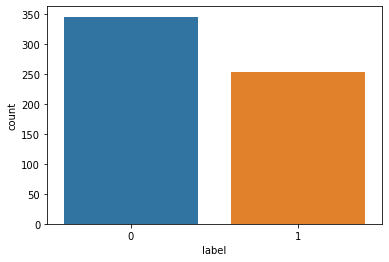

In [9]:
 # plot the label columnn
sns.countplot(x=df.label);

We can see that we have an imbalanced data set, so we are going to use _SMOTE_ for oversampling and dealing with the imbalanceness.

## Modeling
After assigning x and y, we use **SMOTE** for oversampling, than we standardize our data with the **StandardScaler**. After splitting the data into train and test samples we fit and predict our model and show the results in a new dataframe.

In [10]:
# Function to call all Classification Algorithms
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    # assign x and y
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
    # Using SMOTE for oversampling imbalanced data
    sm = SMOTE(random_state=42)
    x, y = sm.fit_resample(x, y)
    # Scale the dataset
    scaler.fit(x)
    x = scaler.transform(x)
    # split data in train and test
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    # create an instance of each classification algorithm
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
    
    # create dataframe with results
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [11]:
classification_funct(df,"label")  # call classification function and see results in a Dataframe

,f1_score,recall_score,precision_score,accuracy_score
XGBClassifier,0.950820,0.935484,0.966667,0.956835
RandomForestClassifier,0.942149,0.919355,0.966102,0.949640
SVC,0.881356,0.838710,0.928571,0.899281
BernoulliNB,0.871795,0.822581,0.927273,0.892086
DecisionTreeClassifier,0.881890,0.903226,0.861538,0.892086
LogisticRegression,0.852713,0.887097,0.820896,0.863309
GaussianNB,0.814286,0.919355,0.730769,0.812950
KNeighborsClassifier,0.720000,0.870968,0.613636,0.697842


The best result scored the **XGBClassifier** with **f1: 95,08%, recall: 93,55%, precision: 96,67% and accuracy score: 95,68%.** followed by the RandomForestClassifier.

## Using Deeplearning

In [12]:
# import Deep Learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
# Build the model
model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # sigmoid for classification

2022-12-21 22:34:35.374280: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
#compile model
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [15]:
# assign x and y
x,y=df.drop("label",axis=1),df[["label"]]    

In [16]:
model.fit(x,y,epochs=150,batch_size=50,verbose=1) # fit model

2022-12-21 22:34:35.606181: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
12/12 [==============================] - 1s 5ms/step - loss: 6.9810 - accuracy: 0.5726
Epoch 2/150
12/12 [==============================] - 0s 4ms/step - loss: 2.1150 - accuracy: 0.6761
Epoch 3/150
12/12 [==============================] - 0s 5ms/step - loss: 1.5570 - accuracy: 0.6477
Epoch 4/150
12/12 [==============================] - 0s 5ms/step - loss: 0.7355 - accuracy: 0.6811
Epoch 5/150
12/12 [==============================] - 0s 5ms/step - loss: 0.6031 - accuracy: 0.7045
Epoch 6/150
12/12 [==============================] - 0s 4ms/step - loss: 0.5881 - accuracy: 0.7045
Epoch 7/150
12/12 [==============================] - 0s 5ms/step - loss: 0.5017 - accuracy: 0.7446
Epoch 8/150
12/12 [==============================] - 0s 5ms/step - loss: 0.5357 - accuracy: 0.7696
Epoch 9/150
12/12 [==============================] - 0s 5ms/step - loss: 0.7054 - accuracy: 0.7028
Epoch 10/150
12/12 [==============================] - 0s 4ms/step - loss: 0.5393 - accuracy: 0.7596
Epoch 11/

In [17]:
model.summary() # show summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 840,193
Trainable params: 840,193
Non-trainable params: 0
_________________________________________________________________


In [18]:
scores=model.evaluate(x,y)

19/19 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9750


In [19]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 97.50%


We have an **Accuracy of 97,50%** using deep learning with 150 epochs, slighlty better than our model above.